# Data Preparation
This Jupyter Notebook demonstrates the steps in order to preprocess the data in order to use them after to train the models - algorithms

## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd

## 2. Load initial dataset 

In [2]:
data = pd.read_csv('real_data.csv')
data.head() 

,Emotion,RGB1_R,RGB1_G,RGB1_B,RGB2_R,RGB2_G,RGB2_B,RGB3_R,RGB3_G,RGB3_B
0,Bright,229,0,13,225,225,255,253,166,74
1,Festive,229,0,13,225,225,255,255,242,0
2,Lively,229,0,13,225,225,255,26,67,155
3,Hot,229,0,13,138,112,12,255,242,0
4,Vigorous,229,0,13,255,242,0,12,32,120


### Initial Information

In [3]:
# Load the dataset
data = pd.read_csv('real_data.csv')

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Remove any leading or trailing whitespace from column names
data.columns = data.columns.str.strip()

# Remove any leading or trailing whitespace from string values in the data
data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Print the shape of the dataset
print("Dataset shape:", data.shape)

# Print the unique emotions
print("Unique emotions:", data['Emotion'].unique())

# Calculate the number of unique emotions
num_unique_emotions = data['Emotion'].nunique()

# Print the number of unique emotions
print("Number of unique emotions:", num_unique_emotions)

# Print the distribution of emotions
print("Emotion distribution:\n", data['Emotion'].value_counts())


Missing values in each column:
Emotion    0
RGB1_R     0
RGB1_G     0
RGB1_B     0
RGB2_R     0
RGB2_G     0
RGB2_B     0
RGB3_R     0
RGB3_G     0
RGB3_B     0
dtype: int64
Dataset shape: (1069, 10)
Unique emotions: ['Bright' 'Festive' 'Lively' 'Hot' 'Vigorous' 'Bold' 'Forceful' 'Dynamic'
 'Dynamic and Active' 'Rich' 'Mature' 'Alluring' 'Untamed' 'Glossy'
 'Fascinating' 'Luxurious' 'Mellow' 'Sweet' 'Cheerful' 'Childlike'
 'Joyful' 'Merry' 'Colourful' 'Brilliant' 'Pretty' 'Sunny' 'Generous'
 'Sweet and Dreamy' 'Sweet - Sour' 'Cute' 'Feminine'
 'Agreeable to the touch' 'Amiable' 'Innocent' 'Smooth' 'Gentle' 'Supple'
 'Soft' 'Charming' 'Gentle and Elegant' 'Mild' 'Genteed' 'Pleasant'
 'Tender' 'Emotional' 'Casual' 'Graceful' 'Calm' 'Sedate' 'Nostalgic'
 'Japanese' 'Elegant' 'Sleek' 'Delicious' 'Interesting' 'Diligent'
 'Extravagant' 'Ethnic' 'Tasteful' 'Robust' 'Fruitful' 'Elaborate'
 'Traditional' 'Substantial' 'Heavy and Deep' 'Old - Fashioned' 'Wild'
 'Serious' 'Strong and Robust' 'D

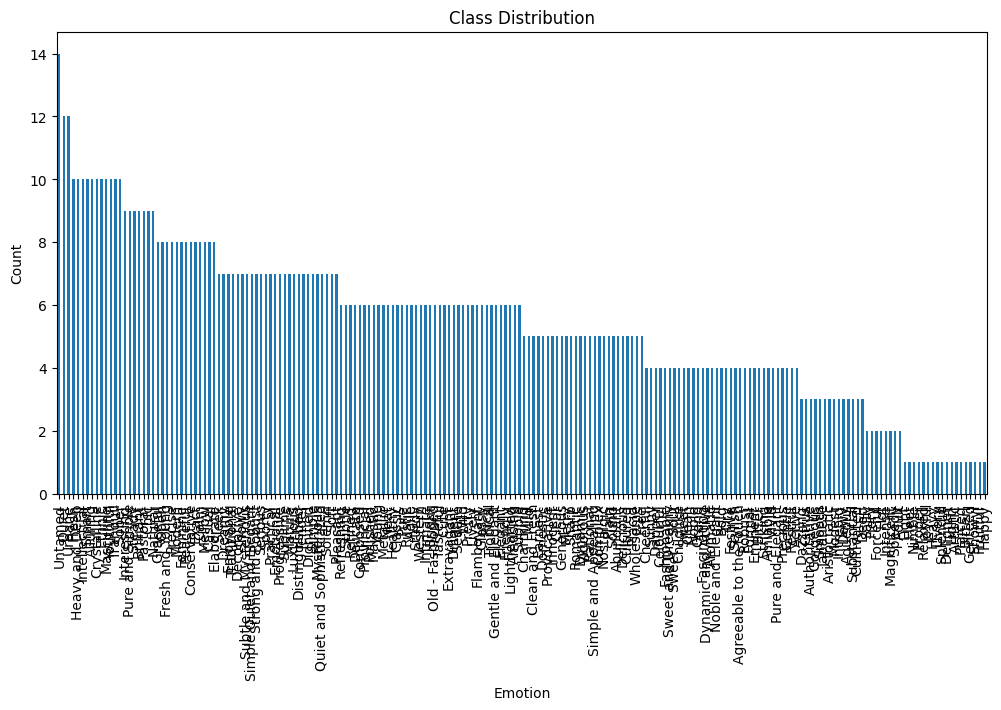

In [4]:
import matplotlib.pyplot as plt

# Plot class distribution
plt.figure(figsize=(12, 6))
data['Emotion'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

### Remove Emotions like " Simple Quiet and Elegant "

In [5]:
# Remove emotions with more than one word
data['Emotion'] = data['Emotion'].apply(lambda x: x if len(x.split()) == 1 else '')

# Drop rows with empty 'Emotion' column
data = data[data['Emotion'] != '']

# Print dataset information
data.head()

,Emotion,RGB1_R,RGB1_G,RGB1_B,RGB2_R,RGB2_G,RGB2_B,RGB3_R,RGB3_G,RGB3_B
0,Bright,229,0,13,225,225,255,253,166,74
1,Festive,229,0,13,225,225,255,255,242,0
2,Lively,229,0,13,225,225,255,26,67,155
3,Hot,229,0,13,138,112,12,255,242,0
4,Vigorous,229,0,13,255,242,0,12,32,120


In [6]:
print("Dataset shape:", data.shape)
print("Unique emotions:", data['Emotion'].unique())

# Calculate the number of unique emotions
num_unique_emotions = data['Emotion'].nunique()
print("Number of unique emotions:", num_unique_emotions)
print("Emotion distribution:\n", data['Emotion'].value_counts())

Dataset shape: (968, 10)
Unique emotions: ['Bright' 'Festive' 'Lively' 'Hot' 'Vigorous' 'Bold' 'Forceful' 'Dynamic'
 'Rich' 'Mature' 'Alluring' 'Untamed' 'Glossy' 'Fascinating' 'Luxurious'
 'Mellow' 'Sweet' 'Cheerful' 'Childlike' 'Joyful' 'Merry' 'Colourful'
 'Brilliant' 'Pretty' 'Sunny' 'Generous' 'Cute' 'Feminine' 'Amiable'
 'Innocent' 'Smooth' 'Gentle' 'Supple' 'Soft' 'Charming' 'Mild' 'Genteed'
 'Pleasant' 'Tender' 'Emotional' 'Casual' 'Graceful' 'Calm' 'Sedate'
 'Nostalgic' 'Japanese' 'Elegant' 'Sleek' 'Delicious' 'Interesting'
 'Diligent' 'Extravagant' 'Ethnic' 'Tasteful' 'Robust' 'Fruitful'
 'Elaborate' 'Traditional' 'Substantial' 'Wild' 'Serious' 'Dazzling'
 'Flamboyant' 'Abundant' 'Tropical' 'Enjoyable' 'Aromatic' 'Friendly'
 'Open' 'Lighthearted' 'Amusing' 'Healthy' 'Domestic' 'Restful' 'Intimate'
 'Free' 'Dreamy' 'Delicate' 'Dry' 'Natural' 'Wholesome' 'Provincial'
 'Placid' 'Modest' 'Chic' 'Aqueous' 'Sober' 'Classic' 'Rustic' 'Practical'
 'Grand' 'Pastoral' 'Sturdy' 'Conserv

### Check for duplicated Emotions

In [7]:
# Check for duplicate rows considering all columns
duplicate_rows = data[data.duplicated(keep=False)]

if not duplicate_rows.empty:
    print("\nDuplicate rows found:")
    print(duplicate_rows)
    print(f"Total number of duplicate rows: {len(duplicate_rows)}")
else:
    print("\nNo duplicate rows found.")


Duplicate rows found:
          Emotion  RGB1_R  RGB1_G  RGB1_B  RGB2_R  RGB2_G  RGB2_B  RGB3_R  \
4        Vigorous     229       0      13     255     242       0      12   
52       Pleasant     234     124     104     208     194     142     215   
56      Emotional     215     188     188     234     124     104     145   
59       Graceful     234     124     104     215     188     188     115   
101      Tropical     212       0      57     255     127       0       0   
...           ...     ...     ...     ...     ...     ...     ...     ...   
1000        Clear     153     215     179     255     255     255     204   
1001       Simple     222     222     222     255     255     255     123   
1002        Fresh     179     221      61     255     255     255     128   
1003  Crystalline     153     215     179     255     255     255     128   
1004         Chic     145     111      93     222     222     222     121   

      RGB3_G  RGB3_B  
4         32     120  
52    

### Remove duplicated Rows

In [8]:
# Remove duplicate rows keeping only the first occurrence
data = data.drop_duplicates(keep='first')

# Check for duplicate rows considering all columns
duplicate_rows = data[data.duplicated(keep=False)]

if not duplicate_rows.empty:
    print("\nDuplicate rows found:")
    print(duplicate_rows)
    print(f"Total number of duplicate rows: {len(duplicate_rows)}")
else:
    print("\nNo duplicate rows found.")


No duplicate rows found.


### Information now

In [9]:
print("Dataset shape:", data.shape)
print("Unique emotions:", data['Emotion'].unique())

# Calculate the number of unique emotions
num_unique_emotions = data['Emotion'].nunique()
print("Number of unique emotions:", num_unique_emotions)
print("Emotion distribution:\n", data['Emotion'].value_counts())

data.to_csv('cleaned_data1.csv', index=False)

Dataset shape: (918, 10)
Unique emotions: ['Bright' 'Festive' 'Lively' 'Hot' 'Vigorous' 'Bold' 'Forceful' 'Dynamic'
 'Rich' 'Mature' 'Alluring' 'Untamed' 'Glossy' 'Fascinating' 'Luxurious'
 'Mellow' 'Sweet' 'Cheerful' 'Childlike' 'Joyful' 'Merry' 'Colourful'
 'Brilliant' 'Pretty' 'Sunny' 'Generous' 'Cute' 'Feminine' 'Amiable'
 'Innocent' 'Smooth' 'Gentle' 'Supple' 'Soft' 'Charming' 'Mild' 'Genteed'
 'Pleasant' 'Tender' 'Emotional' 'Casual' 'Graceful' 'Calm' 'Sedate'
 'Nostalgic' 'Japanese' 'Elegant' 'Sleek' 'Delicious' 'Interesting'
 'Diligent' 'Extravagant' 'Ethnic' 'Tasteful' 'Robust' 'Fruitful'
 'Elaborate' 'Traditional' 'Substantial' 'Wild' 'Serious' 'Dazzling'
 'Flamboyant' 'Abundant' 'Tropical' 'Enjoyable' 'Aromatic' 'Friendly'
 'Open' 'Lighthearted' 'Amusing' 'Healthy' 'Domestic' 'Restful' 'Intimate'
 'Free' 'Dreamy' 'Delicate' 'Dry' 'Natural' 'Wholesome' 'Provincial'
 'Placid' 'Modest' 'Chic' 'Aqueous' 'Sober' 'Classic' 'Rustic' 'Practical'
 'Grand' 'Pastoral' 'Sturdy' 'Conserv

In [10]:
import pandas as pd

# Set pandas option to display all rows
pd.set_option('display.max_rows', None)

# Load the data
data1 = pd.read_csv('cleaned_data1.csv')

print("Emotion distribution:\n", data1['Emotion'].value_counts())

Emotion distribution:
 Emotion
Untamed          14
Urbane           12
Ethnic           10
Tranquil         10
Intellectual     10
Youthful         10
Smart            10
Masculine        10
Alluring          9
Quiet             9
Sober             9
Chic              8
Conservative      8
Natural           8
Crystalline       8
Peaceful          8
Modern            8
Fresh             8
Steady            8
Interesting       8
Casual            8
Exact             8
Elaborate         8
Mellow            8
Brilliant         8
Precise           8
Open              7
Pastoral          7
Dignified         7
Serious           7
Traditional       7
Sublime           7
Luxurious         7
Mature            7
Sleek             7
Calm              7
Graceful          7
Practical         7
Enjoyable         7
Solemn            7
Distinguished     7
Feminine          7
Progressive       7
Soft              7
Sporty            7
Decorative        7
Delicate          6
Refreshing        6
Polished 

#### Count the number of occurrences of each distinct emotion


In [27]:
data1 = pd.read_csv('cleaned_data1.csv')

# Count the number of occurrences of each distinct emotion
emotion_counts = data1['Emotion'].value_counts()

print("Counts of each emotion:")
print(emotion_counts)

# Count the number of distinct emotions
distinct_emotion_count = data1['Emotion'].nunique()

print("Number of distinct emotions:")
print(distinct_emotion_count)

emotion_counts.head()

Counts of each emotion:
Emotion
Untamed          14
Urbane           12
Ethnic           10
Tranquil         10
Intellectual     10
Youthful         10
Smart            10
Masculine        10
Alluring          9
Quiet             9
Sober             9
Chic              8
Conservative      8
Natural           8
Crystalline       8
Peaceful          8
Modern            8
Fresh             8
Steady            8
Interesting       8
Casual            8
Exact             8
Elaborate         8
Mellow            8
Brilliant         8
Precise           8
Open              7
Pastoral          7
Dignified         7
Serious           7
Traditional       7
Sublime           7
Luxurious         7
Mature            7
Sleek             7
Calm              7
Graceful          7
Practical         7
Enjoyable         7
Solemn            7
Distinguished     7
Feminine          7
Progressive       7
Soft              7
Sporty            7
Decorative        7
Delicate          6
Refreshing        6
Polished

Emotion
Untamed         14
Urbane          12
Ethnic          10
Tranquil        10
Intellectual    10
Name: count, dtype: int64

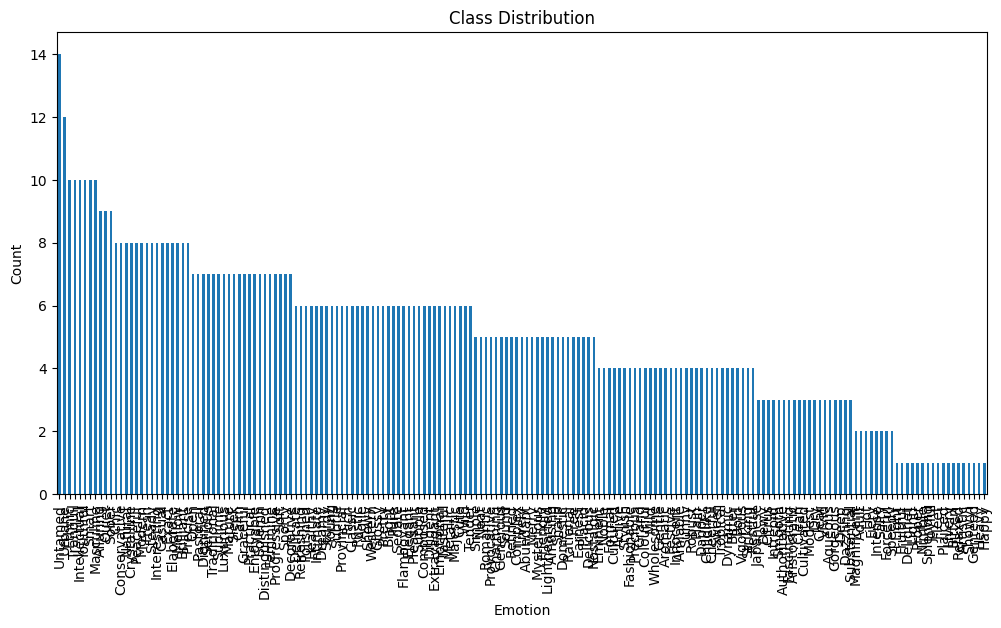

In [28]:
import matplotlib.pyplot as plt

# Plot class distribution
plt.figure(figsize=(12, 6))
data1['Emotion'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

#### Add in a new csv the Different Emotions with the same set of RGB and also the "and" Emotions ξεχωριστά in the "increase_data.csv"

In [29]:
data2 = pd.read_csv('increase_data.csv')

# Count the number of occurrences of each distinct emotion
emotion_counts = data2['Emotion'].value_counts()

print("Counts of each emotion:")
print(emotion_counts)

# Count the number of distinct emotions
distinct_emotion_count = data2['Emotion'].nunique()

print("Number of distinct emotions:")
print(distinct_emotion_count)

# Print the total number of samples
total_samples = len(data2)
print("Total number of samples:")
print(total_samples)

emotion_counts.head()

Counts of each emotion:
Emotion
Simple           15
Untamed          14
Urbane           12
Fresh            11
Young            11
Ethnic           10
Smart            10
Intellectual     10
Elegant          10
Quiet            10
Tranquil         10
Masculine        10
Alluring          9
Pure              9
Youthful          9
Sober             9
Peaceful          8
Steady            8
Subtle            8
Mysterious        8
Deep              8
Interesting       8
Clean             8
Casual            8
Elaborate         8
Natural           8
Precise           8
Mellow            8
Modern            8
Exact             8
Traditional       7
Dreamy            7
Serious           7
Practical         7
Decorative        7
Sporty            7
Sleek             7
Conservative      7
Robust            7
Calm              7
Pastoral          7
Progressive       7
Graceful          7
Sublime           7
Soft              7
Feminine          7
Sophisticated     7
Brilliant         7
Dignifie

Emotion
Simple     15
Untamed    14
Urbane     12
Fresh      11
Young      11
Name: count, dtype: int64

#### Plot the distribution for each Emotion after the changes

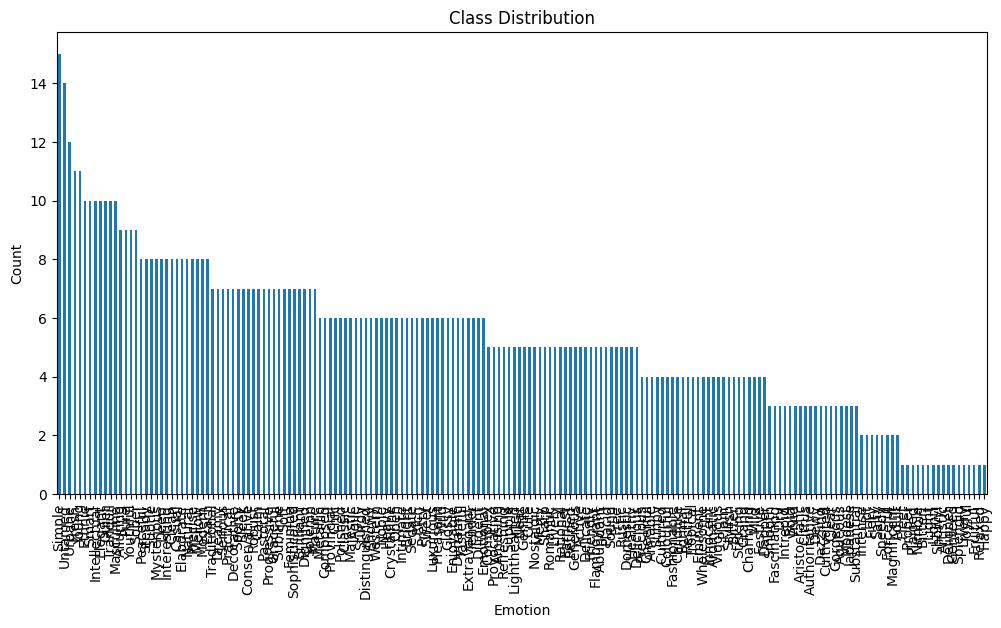

In [15]:
import matplotlib.pyplot as plt

# Plot class distribution
plt.figure(figsize=(12, 6))
data2['Emotion'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

#### Change RGB positions in order to increase the number of the samples - for the minority classes which are all the classes with less than 5 samples

In [40]:
import pandas as pd

# Target emotions definitions (unchanged)
target_emotions_1 = ['Fleet', 'Proper', 'Plaiced', 'Nimble', 'Bitterl', 'Light', 'Lightl', 'Showyl', 'Artistic', 'Delignet', 'Genteed', 'Splendid', 'Livery', 'Joyful', 'Fruitful', 'Relaxed', 'Happy','Intense', 'Hot', 'Fiery', 'Salty', 'Speedy', 'Forceful', 'Magnificent', 'Adult']
target_emotions_2 = ['Smooth', 'Fascinating', 'Dry', 'Intrepid', 'Bold', 'Vivid', 'Aristocratic', 'Citrus', 'Authoritative', 'Dewy', 'Dazzling', 'Cultivated', 'Clear', 'Gorgeous', 'Aqueous', 'Modest', 'Japanese', 'Substantial']
target_emotions_3 = ['Precious', 'Cheerful', 'Amiable', 'Sunny', 'Cultured', 'Colourful', 'Fashionable', 'Childlike', 'Formal', 'Restful', 'Tropical', 'Eminent', 'Wholesome', 'Innocent', 'Aromatic', 'Vigorous', 'Plain', 'Stylish', 'Bitter', 'Striking', 'Grand', 'Charming', 'Mild', 'Festive', 'Dapper' , 'Complex' , 'Provocative' , 'Amusing' , 'Refreshing' , 'Supple' , 'Lighthearted' , 'Neat' , 'Gentle' , 'Cute' , 'Nostalgic' , 'Merry' , 'Sharp' , 'Romantic' , 'Lively' , 'Rational' , 'Earnest' , 'Refined' , 'Generous' , 'Active' , 'Delicate' , 'Friendly' , 'Flamboyant' , 'Abundant' , 'Placid' , 'Sound' , 'Free' , 'Rustic' , 'Domestic' , 'Healthy' , 'Delicious']
target_emotions_4 = ['Traditional', 'Dreamy', 'Serious', 'Practical', 'Decorative', 'Sporty', 'Sleek', 'Conservative', 'Robust', 'Calm', 'Pastoral', 'Progressive', 'Graceful', 'Sublime', 'Soft', 'Feminine', 'Sophisticated', 'Brilliant', 'Dignified', 'Solemn', 'Mature', 'Metallic', 'Composed', 'Provincial', 'Chic', 'Polished', 'Classic', 'Majestic', 'Agile', 'Sturdy', 'Distinguished', 'Showy', 'Western', 'Noble', 'Heavy', 'Crystalline', 'Open', 'Intimate', 'Bright', 'Sedate', 'Rich', 'Pretty', 'Sweet', 'Luxurious', 'Pleasant', 'Wild', 'Glossy', 'Enjoyable', 'Dynamic', 'Tasteful', 'Extravagant', 'Tender', 'Diligent', 'Emotional']

# Read the dataset
data = pd.read_csv('increase_data.csv')

# Create a list to store new rows
new_rows = []

# Function to create new combinations
def create_combinations(emotion, rgb1, rgb2, rgb3, emotions_set):
    if emotions_set == 1:
        return [
            [emotion] + rgb3 + rgb2 + rgb1,
            [emotion] + rgb3 + rgb1 + rgb2,
            [emotion] + rgb2 + rgb3 + rgb1,
            [emotion] + rgb1 + rgb3 + rgb2,
            [emotion] + rgb2 + rgb1 + rgb3
        ]
    elif emotions_set == 2:
        return [
            [emotion] + rgb2 + rgb3 + rgb1,
            [emotion] + rgb1 + rgb3 + rgb2,
            [emotion] + rgb2 + rgb1 + rgb3
        ]
    elif emotions_set == 3:
        return [
            [emotion] + rgb1 + rgb3 + rgb2,
            [emotion] + rgb2 + rgb1 + rgb3
        ]
    elif emotions_set == 4:
        return [
            [emotion] + rgb2 + rgb1 + rgb3
        ]

# Modify the rows for all sets of target emotions
for index, row in data.iterrows():
    emotion = row['Emotion']
    rgb1 = [row['RGB1_R'], row['RGB1_G'], row['RGB1_B']]
    rgb2 = [row['RGB2_R'], row['RGB2_G'], row['RGB2_B']]
    rgb3 = [row['RGB3_R'], row['RGB3_G'], row['RGB3_B']]
    
    if emotion in target_emotions_1:
        new_rows.extend(create_combinations(emotion, rgb1, rgb2, rgb3, 1))
    elif emotion in target_emotions_2:
        new_rows.extend(create_combinations(emotion, rgb1, rgb2, rgb3, 2))
    elif emotion in target_emotions_3:
        new_rows.extend(create_combinations(emotion, rgb1, rgb2, rgb3, 3))
    elif emotion in target_emotions_4:
        new_rows.extend(create_combinations(emotion, rgb1, rgb2, rgb3, 4))

# Create a DataFrame from the new rows
new_data = pd.DataFrame(new_rows, columns=['Emotion', 'RGB1_R', 'RGB1_G', 'RGB1_B', 'RGB2_R', 'RGB2_G', 'RGB2_B', 'RGB3_R', 'RGB3_G', 'RGB3_B'])

# Concatenate the original data with the new data
combined_data = pd.concat([data, new_data], ignore_index=True)

# Save the modified dataset to a new CSV file
combined_data.to_csv('6samples.csv', index=False)

#### Do Data check like in the previous datasets to be sure it's ok !

In [41]:
data3 = pd.read_csv('6samples.csv')

# Count the number of occurrences of each distinct emotion
emotion_counts = data3['Emotion'].value_counts()

print("Counts of each emotion:")
print(emotion_counts)

# Count the number of distinct emotions
distinct_emotion_count = data3['Emotion'].nunique()

print("Number of distinct emotions:")
print(distinct_emotion_count)

emotion_counts.head()

Counts of each emotion:
Emotion
Friendly         15
Lighthearted     15
Supple           15
Gentle           15
Sharp            15
Active           15
Flamboyant       15
Abundant         15
Cute             15
Generous         15
Provocative      15
Simple           15
Complex          15
Nostalgic        15
Merry            15
Romantic         15
Amusing          15
Refreshing       15
Delicious        15
Domestic         15
Free             15
Rational         15
Neat             15
Delicate         15
Earnest          15
Healthy          15
Refined          15
Placid           15
Lively           15
Sound            15
Rustic           15
Traditional      14
Sophisticated    14
Robust           14
Pastoral         14
Progressive      14
Serious          14
Solemn           14
Dreamy           14
Decorative       14
Sporty           14
Practical        14
Sleek            14
Conservative     14
Mature           14
Dignified        14
Brilliant        14
Feminine         14
Untamed 

Emotion
Friendly        15
Lighthearted    15
Supple          15
Gentle          15
Sharp           15
Name: count, dtype: int64

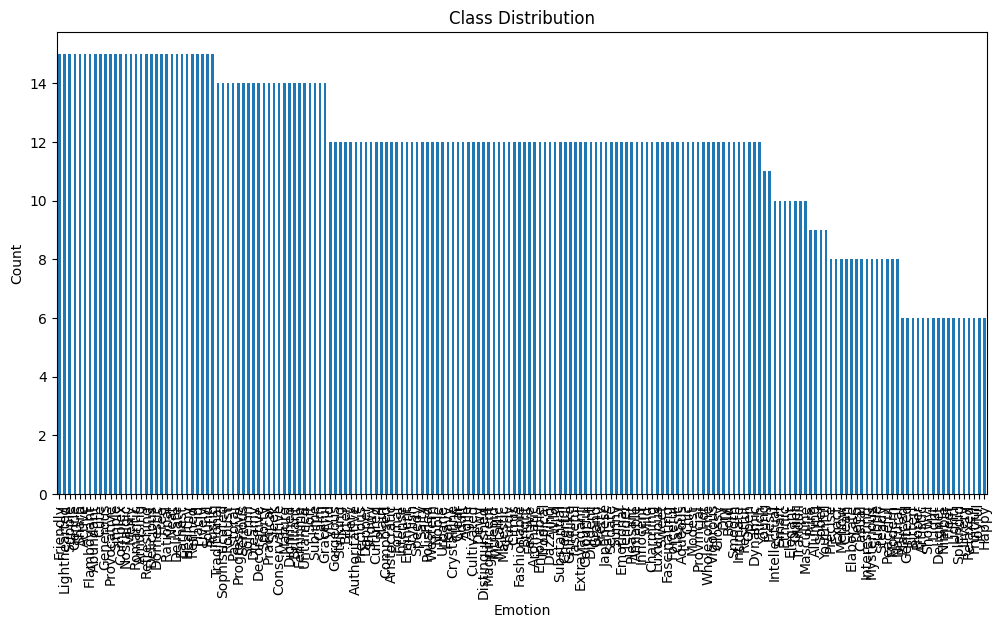

In [42]:
import matplotlib.pyplot as plt

# Plot class distribution
plt.figure(figsize=(12, 6))
data3['Emotion'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

### x6perfect.csv 
This csv file it will have *6 for all the classes and after i reach the most classes i will use the SMOTE technique to oversample and the rest classes with fewer samples !

In [1]:
import pandas as pd

# Read the dataset
data = pd.read_csv('increase_data.csv')

# Function to create new combinations
def create_combinations(emotion, rgb1, rgb2, rgb3):
    return [
        [emotion] + rgb1 + rgb2 + rgb3,
        [emotion] + rgb1 + rgb3 + rgb2,
        [emotion] + rgb2 + rgb1 + rgb3,
        [emotion] + rgb2 + rgb3 + rgb1,
        [emotion] + rgb3 + rgb1 + rgb2,
        [emotion] + rgb3 + rgb2 + rgb1
    ]

# Create a list to store new rows
new_rows = []

# Modify the rows for all samples
for index, row in data.iterrows():
    emotion = row['Emotion']
    rgb1 = [row['RGB1_R'], row['RGB1_G'], row['RGB1_B']]
    rgb2 = [row['RGB2_R'], row['RGB2_G'], row['RGB2_B']]
    rgb3 = [row['RGB3_R'], row['RGB3_G'], row['RGB3_B']]
    
    # Create new combinations for each sample
    new_rows.extend(create_combinations(emotion, rgb1, rgb2, rgb3))

# Create a DataFrame from the new rows
new_data = pd.DataFrame(new_rows, columns=['Emotion', 'RGB1_R', 'RGB1_G', 'RGB1_B', 'RGB2_R', 'RGB2_G', 'RGB2_B', 'RGB3_R', 'RGB3_G', 'RGB3_B'])

# Concatenate the original data with the new data
combined_data = pd.concat([data, new_data], ignore_index=True)

# Save the modified dataset to a new CSV file
combined_data.to_csv('x6perfect.csv', index=False)

print(f"Original data shape: {data.shape}")
print(f"New data shape: {new_data.shape}")
print(f"Combined data shape: {combined_data.shape}")

Original data shape: (963, 10)
New data shape: (5778, 10)
Combined data shape: (6741, 10)


In [4]:
data4 = pd.read_csv('increase_data.csv')

# Count the number of occurrences of each distinct emotion
emotion_counts = data4['Emotion'].value_counts()

print("Counts of each emotion:")
print(emotion_counts)

data5 = pd.read_csv('x6perfect.csv')

# Count the number of occurrences of each distinct emotion
emotion_counts = data5['Emotion'].value_counts()

print("Counts of each emotion:")
print(emotion_counts)

Counts of each emotion:
Emotion
Simple      15
Untamed     14
Urbane      12
Fresh       11
Young       11
            ..
Livery       1
Joyful       1
Fruitful     1
Relaxed      1
Happy        1
Name: count, Length: 182, dtype: int64
Counts of each emotion:
Emotion
Simple      105
Untamed      98
Urbane       84
Fresh        77
Young        77
           ... 
Livery        7
Joyful        7
Fruitful      7
Relaxed       7
Happy         7
Name: count, Length: 182, dtype: int64


#### Oversampling using SMOTE

Initial class distribution:
Counter({'Lively': 15, 'Merry': 15, 'Generous': 15, 'Cute': 15, 'Gentle': 15, 'Supple': 15, 'Nostalgic': 15, 'Delicious': 15, 'Flamboyant': 15, 'Abundant': 15, 'Friendly': 15, 'Lighthearted': 15, 'Amusing': 15, 'Healthy': 15, 'Domestic': 15, 'Free': 15, 'Delicate': 15, 'Placid': 15, 'Rustic': 15, 'Sound': 15, 'Complex': 15, 'Provocative': 15, 'Active': 15, 'Refreshing': 15, 'Simple': 15, 'Neat': 15, 'Sharp': 15, 'Romantic': 15, 'Rational': 15, 'Earnest': 15, 'Refined': 15, 'Mature': 14, 'Untamed': 14, 'Brilliant': 14, 'Feminine': 14, 'Soft': 14, 'Graceful': 14, 'Calm': 14, 'Sleek': 14, 'Robust': 14, 'Traditional': 14, 'Serious': 14, 'Dreamy': 14, 'Practical': 14, 'Pastoral': 14, 'Conservative': 14, 'Sporty': 14, 'Decorative': 14, 'Solemn': 14, 'Progressive': 14, 'Sophisticated': 14, 'Dignified': 14, 'Sublime': 14, 'Bright': 12, 'Festive': 12, 'Hot': 12, 'Vigorous': 12, 'Bold': 12, 'Forceful': 12, 'Dynamic': 12, 'Rich': 12, 'Glossy': 12, 'Fascinating': 12, 'L

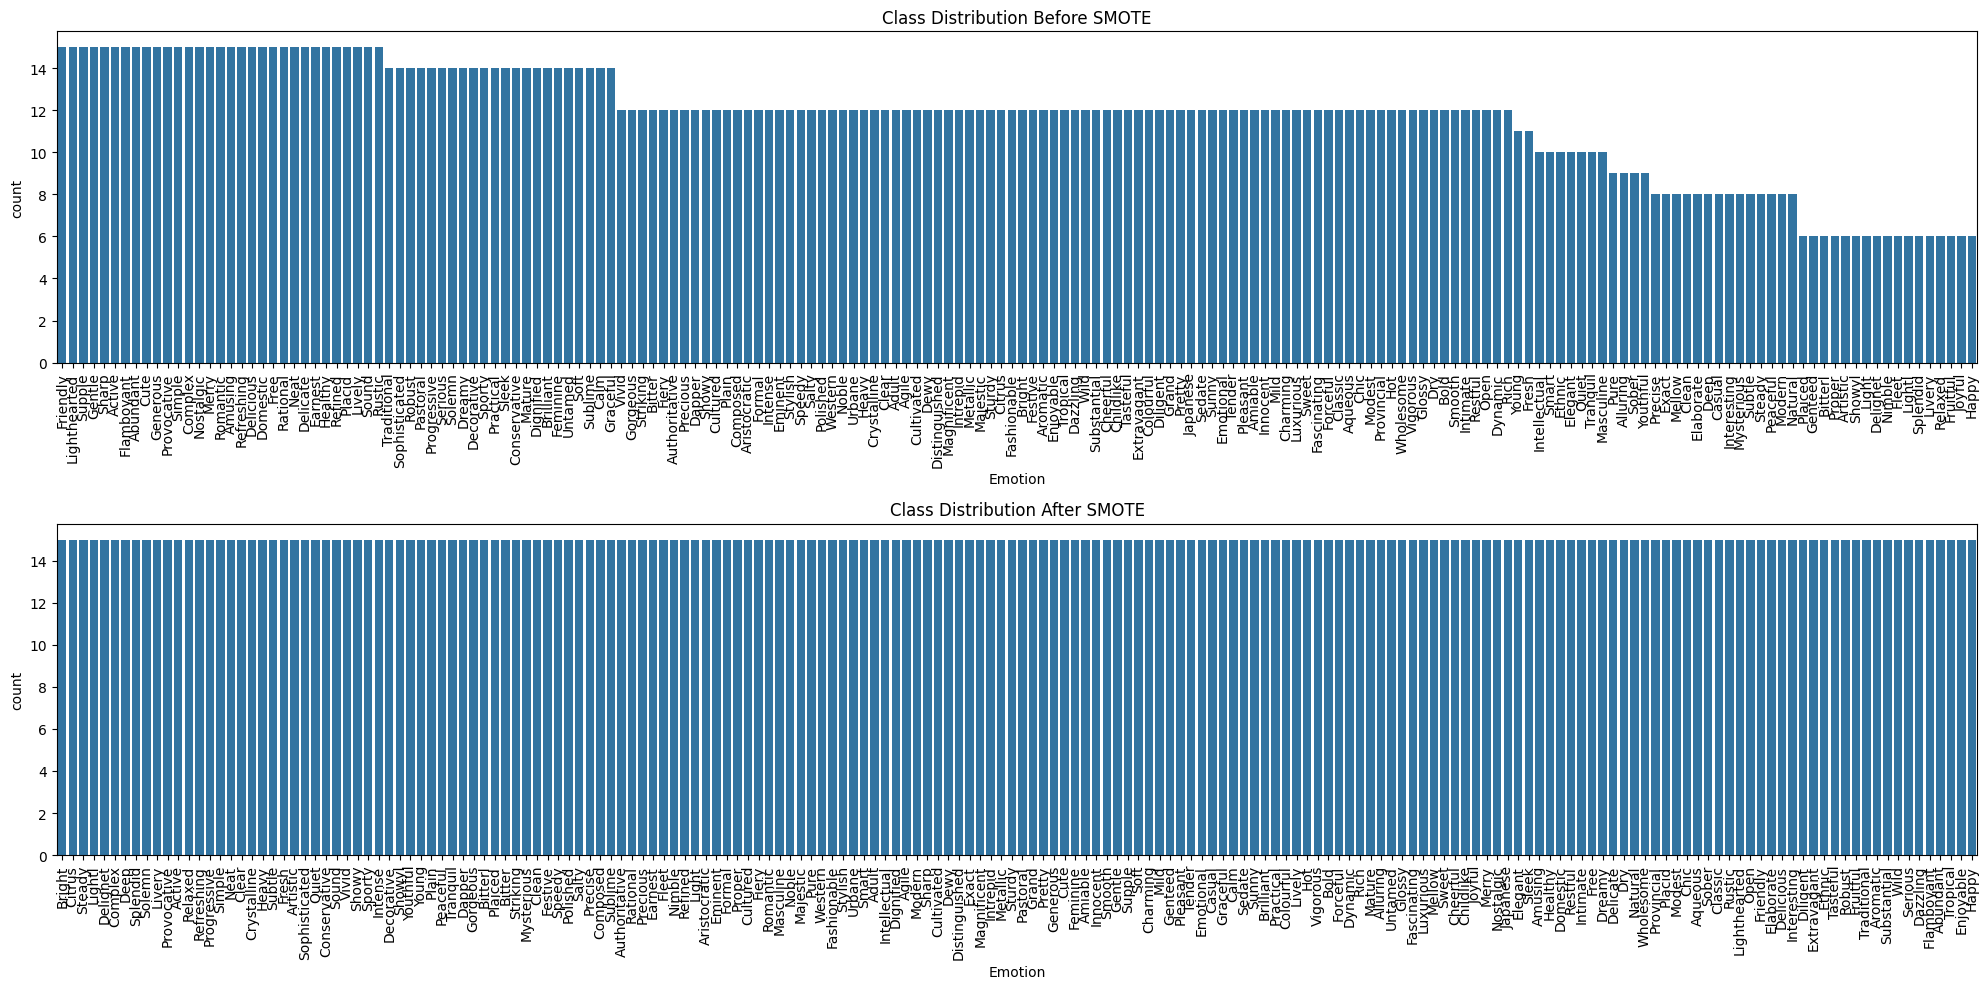

In [45]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('6samples.csv')

# Separate features and target
X = df.drop('Emotion', axis=1)  # Features
y = df['Emotion']  # Target

# Print the initial class distribution
print("Initial class distribution:")
print(Counter(y))

# Apply SMOTE with fewer neighbors
smote = SMOTE(k_neighbors=1)  # Adjust based on your minimum class size
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the new class distribution after SMOTE
print("\nClass distribution after SMOTE:")
print(Counter(y_resampled))

# Create a new DataFrame with the resampled data
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Emotion')], axis=1)

# Save the resampled dataset to a new CSV file
df_resampled.to_csv('resampled_dataset.csv', index=False)

# Plot the class distribution before and after SMOTE
plt.figure(figsize=(20, 10))

plt.subplot(2, 1, 1)
sns.countplot(x=y, order=y.value_counts().index)
plt.title('Class Distribution Before SMOTE')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
sns.countplot(x=y_resampled, order=y_resampled.value_counts().index)
plt.title('Class Distribution After SMOTE')
plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig('class_distribution.png')
plt.show()

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('x6perfect.csv')

# Separate features and target
X = df.drop('Emotion', axis=1)  # Features
y = df['Emotion']  # Target

# Print the initial class distribution
print("Initial class distribution:")
print(Counter(y))

# Apply SMOTE with fewer neighbors
smote = SMOTE(k_neighbors=1)  # Adjust based on your minimum class size
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the new class distribution after SMOTE
print("\nClass distribution after SMOTE:")
print(Counter(y_resampled))

# Create a new DataFrame with the resampled data
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Emotion')], axis=1)

# Save the resampled dataset to a new CSV file
df_resampled.to_csv('x6perfect_reseampled.csv', index=False)

# Plot the class distribution before and after SMOTE
plt.figure(figsize=(20, 10))

plt.subplot(2, 1, 1)
sns.countplot(x=y, order=y.value_counts().index)
plt.title('Class Distribution Before SMOTE')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
sns.countplot(x=y_resampled, order=y_resampled.value_counts().index)
plt.title('Class Distribution After SMOTE')
plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig('class_distribution.png')
plt.show()

#### Oversampling using ADASYN

In [44]:
import pandas as pd
from imblearn.over_sampling import ADASYN
from collections import Counter

# Load the dataset
df = pd.read_csv('6samples.csv')

# Separate features and target
X = df.drop('Emotion', axis=1)  # Features
y = df['Emotion']  # Target

# Print the initial class distribution
print("Initial class distribution:")
print(Counter(y))

# Apply ADASYN
adasyn = ADASYN(sampling_strategy='auto', n_neighbors=1, random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Print the new class distribution after ADASYN
print("\nClass distribution after ADASYN:")
print(Counter(y_resampled))

Initial class distribution:
Counter({'Lively': 15, 'Merry': 15, 'Generous': 15, 'Cute': 15, 'Gentle': 15, 'Supple': 15, 'Nostalgic': 15, 'Delicious': 15, 'Flamboyant': 15, 'Abundant': 15, 'Friendly': 15, 'Lighthearted': 15, 'Amusing': 15, 'Healthy': 15, 'Domestic': 15, 'Free': 15, 'Delicate': 15, 'Placid': 15, 'Rustic': 15, 'Sound': 15, 'Complex': 15, 'Provocative': 15, 'Active': 15, 'Refreshing': 15, 'Simple': 15, 'Neat': 15, 'Sharp': 15, 'Romantic': 15, 'Rational': 15, 'Earnest': 15, 'Refined': 15, 'Mature': 14, 'Untamed': 14, 'Brilliant': 14, 'Feminine': 14, 'Soft': 14, 'Graceful': 14, 'Calm': 14, 'Sleek': 14, 'Robust': 14, 'Traditional': 14, 'Serious': 14, 'Dreamy': 14, 'Practical': 14, 'Pastoral': 14, 'Conservative': 14, 'Sporty': 14, 'Decorative': 14, 'Solemn': 14, 'Progressive': 14, 'Sophisticated': 14, 'Dignified': 14, 'Sublime': 14, 'Bright': 12, 'Festive': 12, 'Hot': 12, 'Vigorous': 12, 'Bold': 12, 'Forceful': 12, 'Dynamic': 12, 'Rich': 12, 'Glossy': 12, 'Fascinating': 12, 'L

ValueError: No samples will be generated with the provided ratio settings.